In [ ]:
import pandas as pd
import numpy as np
data = pd.read_csv('/content/drive/MyDrive/archive/new_abalone.data')
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [ ]:
data.isna().any()

Sex               False
Length            False
Diameter          False
Height            False
Whole weight      False
Shucked weight    False
Viscera weight    False
Shell weight      False
Rings             False
dtype: bool

In [ ]:
data.duplicated().value_counts()

False    4177
dtype: int64

In [ ]:
data.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


In [ ]:
data["Age"] = data["Rings"] + 1.5
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


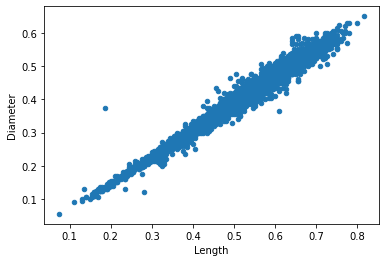

In [ ]:
import matplotlib.pyplot as plt

data.plot(kind = "scatter",x="Length",y="Diameter")
plt.show()

In [ ]:
import seaborn as sns
sns.pairplot(data)

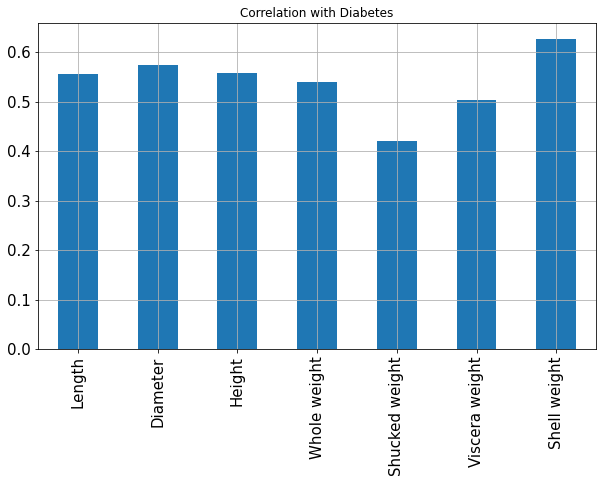

In [ ]:
y = data["Rings"]
X = data.drop(columns=['Age','Rings'],axis=1)
X.corrwith(y).plot.bar(
        figsize = (10, 6), title = "Correlation with Diabetes", fontsize = 15,
        rot = 90, grid = True)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,confusion_matrix
from sklearn.model_selection import train_test_split

X = data.drop(columns=['Rings','Age','Sex'],axis=1)
y = data['Rings']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state=45)

logreg = LinearRegression ()

logreg.fit (X_train , y_train)
y_pred = logreg.predict(X_test)
print ("Accuracy: " , r2_score(y_test , y_pred))

Accuracy:  0.5127780353508009
